In [6]:
import csv
a = []
with open('finds1.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))
num_attribute = len(a[0])-1 
print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)


[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv("enjoysport.csv")
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['red' 'circle' 'no']
 ['red' 'trianlge' 'no']
 ['red' 'circle' 'yes']
 ['blue' 'circle' 'no']
 ['blue' 'circle' 'yes']]

Target Values are:  [nan nan nan nan nan]

Initialization of specific_h and genearal_h

Specific Boundary:  ['red' 'circle' 'no']

Generic Boundary:  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]

Instance 1 is  ['red' 'circle' 'no']
Specific Bundary after  1 Instance is  ['red' 'circle' 'no']
Generic Boundary after  1 Instance is  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]



Instance 2 is  ['red' 'trianlge' 'no']
Specific Bundary after  2 Instance is  ['red' 'circle' 'no']
Generic Boundary after  2 Instance is  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]



Instance 3 is  ['red' 'circle' 'yes']
Specific Bundary after  3 Instance is  ['red' 'circle' 'no']
Generic Boundary after  3 Instance is  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]



Instance 4 is  ['blue' 'circle' 'no']
Specific Bundary after  4 Instance is  [

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

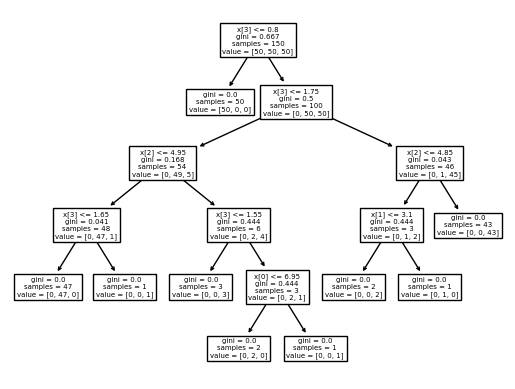

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)

plot_tree(clf)


Accuracy: 1.0


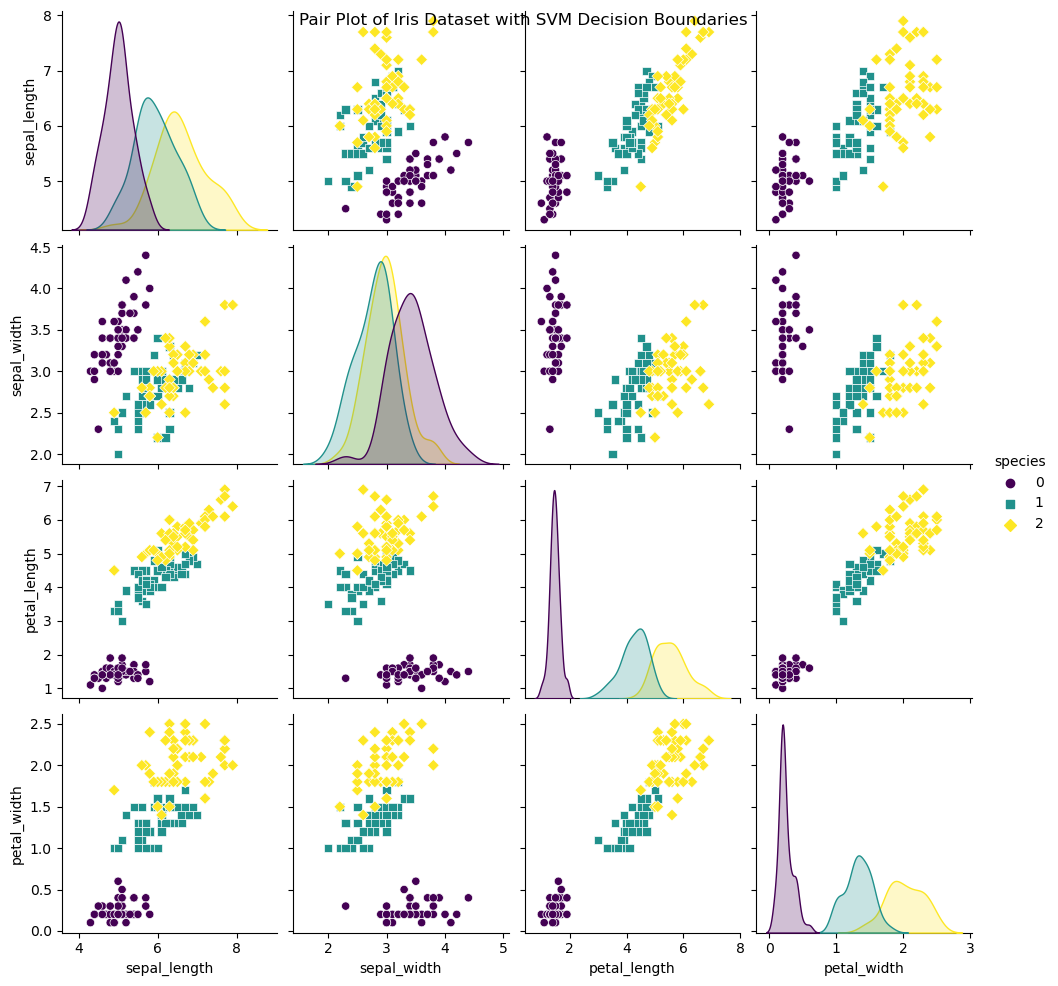

In [10]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

iris_df = sns.load_dataset('iris')
iris_df['species'] = iris_df['species'].astype('category').cat.codes

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset with SVM Decision Boundaries')
plt.show()

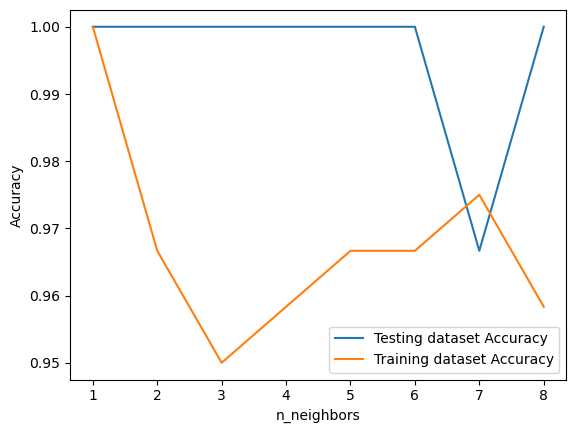

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize_parameters(k, data):
    """
    Initialize the parameters for the Gaussian Mixture Model.
    """
    np.random.seed(42)
    n, d = data.shape
    means = data[np.random.choice(n, k, replace=False)]
    covariances = [np.eye(d) for _ in range(k)]
    weights = np.ones(k) / k
    return means, covariances, weights

def calculate_likelihood(data, means, covariances, weights):
    """
    Calculate the likelihood of the data given the current parameters.
    """
    k = len(means)
    likelihood = np.zeros((len(data), k))
    
    for i in range(k):
        likelihood[:, i] = multivariate_normal.pdf(data, means[i], covariances[i])
    
    return likelihood

def expectation_step(data, means, covariances, weights):
    """
    E-step: Calculate the responsibilities of each cluster for each data point.
    """
    likelihood = calculate_likelihood(data, means, covariances, weights)
    responsibilities = likelihood * weights
    responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
    return responsibilities

def maximization_step(data, responsibilities):
    """
    M-step: Update the parameters based on the calculated responsibilities.
    """
    Nk = np.sum(responsibilities, axis=0)
    means = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]
    
    covariances = []
    for k in range(len(Nk)):
        diff = data - means[k]
        cov_k = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
        covariances.append(cov_k)
    
    covariances = np.array(covariances)
    
    weights = Nk / len(data)
    
    return means, covariances, weights

def em_algorithm(data, k, max_iter=100, tol=1e-4):
    """
    Perform the Expectation-Maximization algorithm.
    """
    means, covariances, weights = initialize_parameters(k, data)
    
    for _ in range(max_iter):
        # E-step
        responsibilities = expectation_step(data, means, covariances, weights)
        
        # M-step
        new_means, new_covariances, new_weights = maximization_step(data, responsibilities)
        
        # Check for convergence
        if np.linalg.norm(new_means - means) < tol and np.linalg.norm(new_covariances - covariances) < tol and np.linalg.norm(new_weights - weights) < tol:
            break
        
        means, covariances, weights = new_means, new_covariances, new_weights
    
    return means, covariances, weights

# Example usage
if __name__ == "__main__":
    # Generate synthetic data for demonstration
    np.random.seed(42)
    data1 = np.random.multivariate_normal([3, 3], [[1, 0.5], [0.5, 1]], 100)
    data2 = np.random.multivariate_normal([8, 8], [[1, -0.5], [-0.5, 1]], 100)
    data = np.concatenate([data1, data2])

    # Perform EM algorithm
    k = 2
    means, covariances, weights = em_algorithm(data, k)

    print("Means:")
    print(means)
    print("\nCovariances:")
    print(covariances)
    print("\nWeights:")
    print(weights)


Means:
[[3.08307108 3.11709339]
 [7.91067722 8.13281057]]

Covariances:
[[[ 0.81509575  0.29752212]
  [ 0.29752212  0.76768986]]

 [[ 1.08836658 -0.5861711 ]
  [-0.5861711   0.94906901]]]

Weights:
[0.50000007 0.49999993]


In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
dataset = pd.read_csv(url, names=names)

# Preprocess dataset
dataset = dataset.drop(["fnlwgt"], axis=1)
dataset = pd.get_dummies(dataset, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
X = dataset.drop(["income"], axis=1)
y = dataset["income"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.7918010133578995


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, names=names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

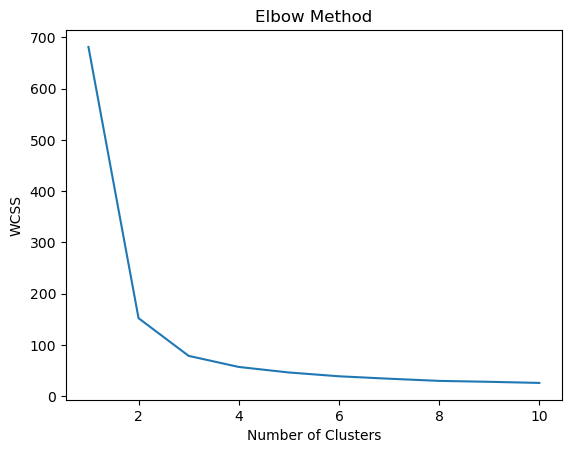

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


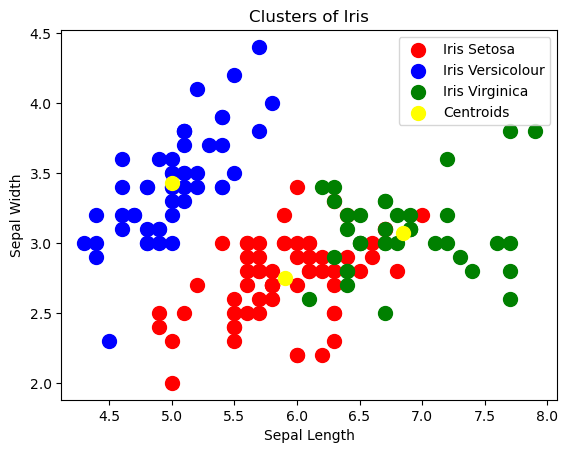

In [12]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


transactions = [
    ['bread', 'milk', 'beer'],
    ['bread', 'diapers', 'eggs'],
    ['milk', 'diapers', 'beer', 'colt45'],
    ['bread', 'milk', 'eggs'],
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules)



Frequent Itemsets:
   support       itemsets
0     0.50         (beer)
1     0.75        (bread)
2     0.50      (diapers)
3     0.50         (eggs)
4     0.75         (milk)
5     0.50   (beer, milk)
6     0.50  (eggs, bread)
7     0.50  (milk, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (beer)      (milk)                 0.5                0.75      0.5   
1      (eggs)     (bread)                 0.5                0.75      0.5   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  1.333333     0.125         inf            0.5  
1         1.0  1.333333     0.125         inf            0.5  


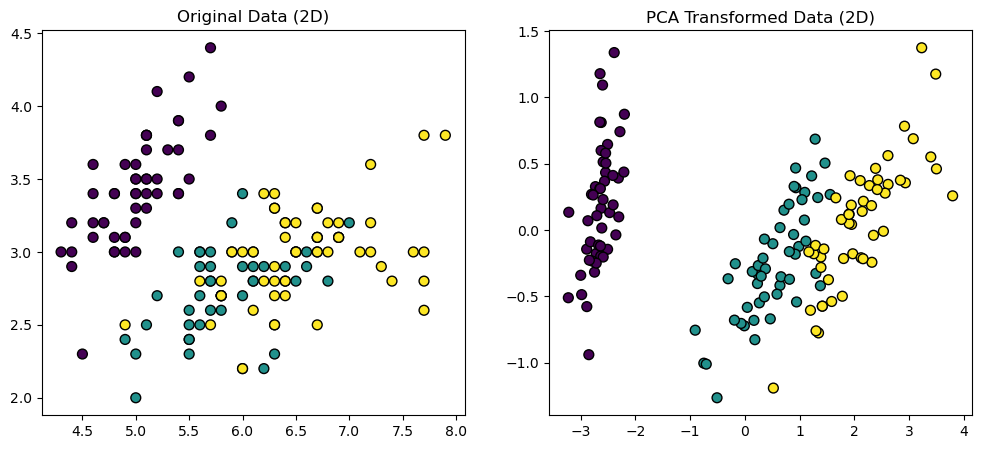

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Data (2D)")


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA Transformed Data (2D)")

plt.show()